# 🏠 House Price Prediction - Exploratory Data Analysis (EDA)

## VietAI - Foundations of Machine Learning Final Project

**Mục tiêu:**
- Hiểu rõ cấu trúc và đặc điểm của bộ dữ liệu House Prices
- Phân tích thống kê mô tả các biến
- Phát hiện missing values và outliers
- Trực quan hóa mối tương quan giữa các biến

**Dataset:** [Kaggle House Prices Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Create directories
os.makedirs('../data/raw', exist_ok=True)
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../reports', exist_ok=True)
os.makedirs('../models', exist_ok=True)

# Custom color palette
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'accent': '#F18F01',
    'success': '#C73E1D',
    'dark': '#3B1F2B'
}

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


## 1. Load Data

**Lưu ý:** Tải dữ liệu từ [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) và đặt trong thư mục `../data/raw/`


In [2]:
# Load training data
train_path = '../data/raw/train.csv'
test_path = '../data/raw/test.csv'

try:
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    print(f"✅ Training data loaded: {train_df.shape[0]} rows, {train_df.shape[1]} columns")
    print(f"✅ Test data loaded: {test_df.shape[0]} rows, {test_df.shape[1]} columns")
except FileNotFoundError:
    print("⚠️ Data files not found!")
    print("Please download data from: https://www.kaggle.com/c/house-prices-advanced-regression-techniques")
    print("And place train.csv and test.csv in ../data/raw/ folder")


✅ Training data loaded: 1460 rows, 81 columns
✅ Test data loaded: 1459 rows, 80 columns


In [3]:
# First look at the data
train_df.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [4]:
# Data info
print("="*60)
print("DATA INFO")
print("="*60)
train_df.info()


DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18

## 2. Thống Kê Mô Tả (Descriptive Statistics)


In [5]:
# Numerical columns statistics
print("📊 THỐNG KÊ CÁC BIẾN SỐ")
print("="*80)
train_df.describe().T


📊 THỐNG KÊ CÁC BIẾN SỐ


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
# Categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns
numerical_cols = train_df.select_dtypes(include=[np.number]).columns

print(f"\n📌 Số lượng biến số (Numerical): {len(numerical_cols)}")
print(f"📌 Số lượng biến phân loại (Categorical): {len(categorical_cols)}")
print(f"\n🔢 Biến số: {list(numerical_cols[:10])}...")
print(f"\n📝 Biến phân loại: {list(categorical_cols[:10])}...")



📌 Số lượng biến số (Numerical): 38
📌 Số lượng biến phân loại (Categorical): 43

🔢 Biến số: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1']...

📝 Biến phân loại: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']...


In [7]:
# Target variable (SalePrice) statistics
print("\n🎯 BIẾN MỤC TIÊU: SalePrice")
print("="*50)
print(train_df['SalePrice'].describe())
print(f"\n📈 Skewness: {train_df['SalePrice'].skew():.4f}")
print(f"📊 Kurtosis: {train_df['SalePrice'].kurtosis():.4f}")



🎯 BIẾN MỤC TIÊU: SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

📈 Skewness: 1.8829
📊 Kurtosis: 6.5363


## 3. Phân Tích Missing Values


In [8]:
# Missing values analysis
def analyze_missing_values(df, name="Dataset"):
    """Analyze missing values in a DataFrame."""
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing Count': missing.values,
        'Missing %': missing_pct.values
    })
    
    missing_df = missing_df[missing_df['Missing Count'] > 0]
    missing_df = missing_df.sort_values('Missing %', ascending=False)
    
    print(f"\n🔍 {name} - MISSING VALUES ANALYSIS")
    print("="*60)
    print(f"Tổng số cột có missing values: {len(missing_df)}")
    print(f"Tổng số giá trị missing: {missing_df['Missing Count'].sum()}")
    
    return missing_df

missing_train = analyze_missing_values(train_df, "Training Data")
missing_train.head(20)



🔍 Training Data - MISSING VALUES ANALYSIS
Tổng số cột có missing values: 19
Tổng số giá trị missing: 7829


,Column,Missing Count,Missing %
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
25,MasVnrType,872,59.726027
57,FireplaceQu,690,47.260274
3,LotFrontage,259,17.739726
58,GarageType,81,5.547945
59,GarageYrBlt,81,5.547945
60,GarageFinish,81,5.547945


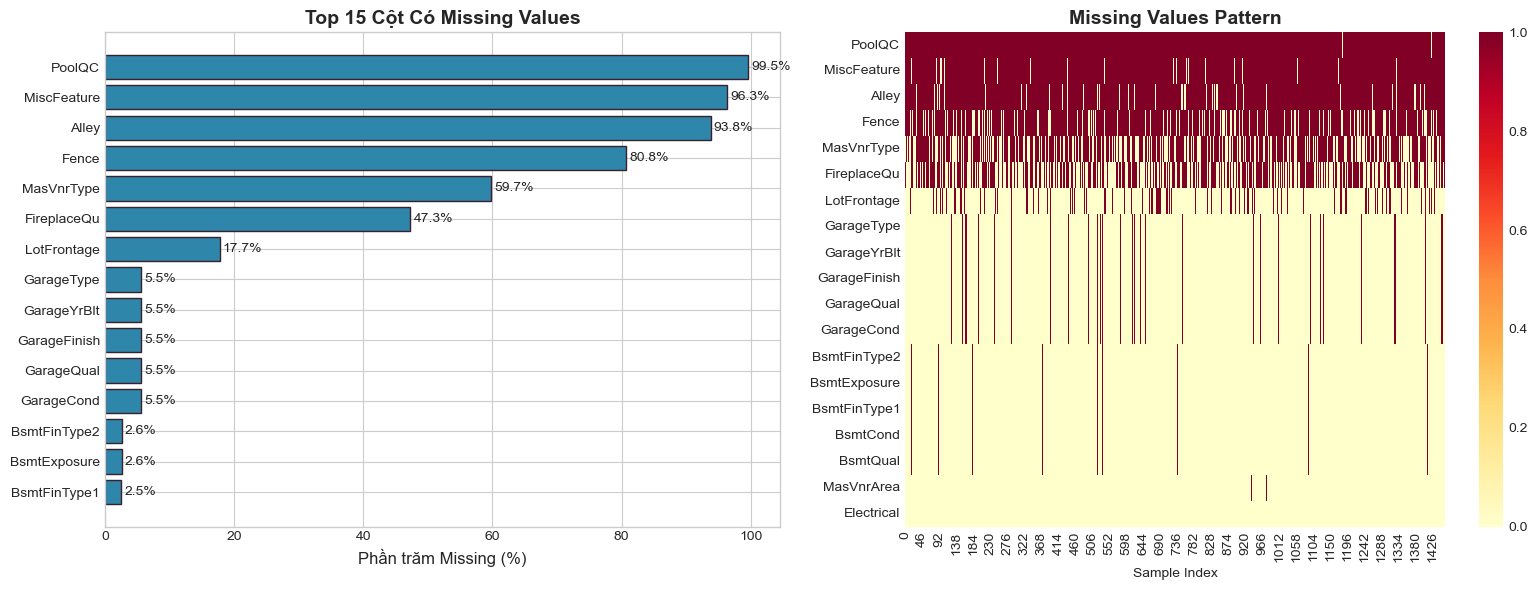

In [9]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of missing values
if len(missing_train) > 0:
    top_missing = missing_train.head(15)
    ax1 = axes[0]
    bars = ax1.barh(top_missing['Column'], top_missing['Missing %'], 
                    color=COLORS['primary'], edgecolor=COLORS['dark'])
    ax1.set_xlabel('Phần trăm Missing (%)', fontsize=12)
    ax1.set_title('Top 15 Cột Có Missing Values', fontsize=14, fontweight='bold')
    ax1.invert_yaxis()
    
    # Add value labels
    for bar, pct in zip(bars, top_missing['Missing %']):
        ax1.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{pct:.1f}%', va='center', fontsize=10)

# Heatmap of missing values
ax2 = axes[1]
cols_with_missing = missing_train['Column'].tolist()[:20]
if cols_with_missing:
    msno_data = train_df[cols_with_missing].isnull()
    sns.heatmap(msno_data.T, cbar=True, ax=ax2, cmap='YlOrRd')
    ax2.set_title('Missing Values Pattern', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Sample Index')

plt.tight_layout()
plt.savefig('../reports/missing_values.png', dpi=150, bbox_inches='tight')
plt.show()


## 4. Phân Tích Biến Mục Tiêu (Target Variable)


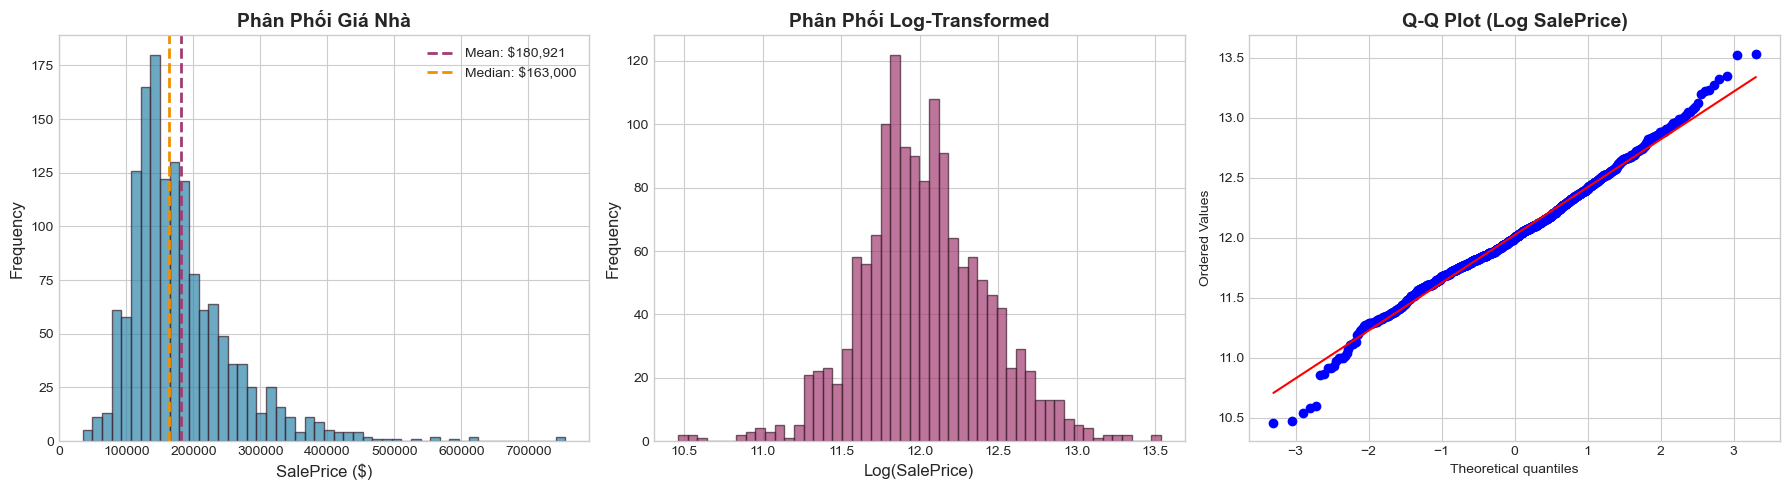


📊 Skewness gốc: 1.8829
📊 Skewness sau log transform: 0.1213


In [10]:
# Target variable distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
ax1 = axes[0]
ax1.hist(train_df['SalePrice'], bins=50, color=COLORS['primary'], 
         edgecolor=COLORS['dark'], alpha=0.7)
ax1.axvline(train_df['SalePrice'].mean(), color=COLORS['secondary'], 
            linestyle='--', linewidth=2, label=f'Mean: ${train_df["SalePrice"].mean():,.0f}')
ax1.axvline(train_df['SalePrice'].median(), color=COLORS['accent'], 
            linestyle='--', linewidth=2, label=f'Median: ${train_df["SalePrice"].median():,.0f}')
ax1.set_xlabel('SalePrice ($)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Phân Phối Giá Nhà', fontsize=14, fontweight='bold')
ax1.legend()

# Log-transformed
ax2 = axes[1]
log_price = np.log1p(train_df['SalePrice'])
ax2.hist(log_price, bins=50, color=COLORS['secondary'], 
         edgecolor=COLORS['dark'], alpha=0.7)
ax2.set_xlabel('Log(SalePrice)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Phân Phối Log-Transformed', fontsize=14, fontweight='bold')

# Q-Q Plot
ax3 = axes[2]
stats.probplot(log_price, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot (Log SalePrice)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n📊 Skewness gốc: {train_df['SalePrice'].skew():.4f}")
print(f"📊 Skewness sau log transform: {log_price.skew():.4f}")


## 5. Phân Tích Tương Quan (Correlation Analysis)


In [11]:
# Correlation with SalePrice
correlations = train_df.select_dtypes(include=[np.number]).corr()['SalePrice'].sort_values(ascending=False)

print("🔗 TOP 15 BIẾN TƯƠNG QUAN CAO NHẤT VỚI SALEPRICE")
print("="*50)
for col, corr in correlations.head(16).items():
    if col != 'SalePrice':
        print(f"{col:25s}: {corr:.4f}")


🔗 TOP 15 BIẾN TƯƠNG QUAN CAO NHẤT VỚI SALEPRICE
OverallQual              : 0.7910
GrLivArea                : 0.7086
GarageCars               : 0.6404
GarageArea               : 0.6234
TotalBsmtSF              : 0.6136
1stFlrSF                 : 0.6059
FullBath                 : 0.5607
TotRmsAbvGrd             : 0.5337
YearBuilt                : 0.5229
YearRemodAdd             : 0.5071
GarageYrBlt              : 0.4864
MasVnrArea               : 0.4775
Fireplaces               : 0.4669
BsmtFinSF1               : 0.3864
LotFrontage              : 0.3518


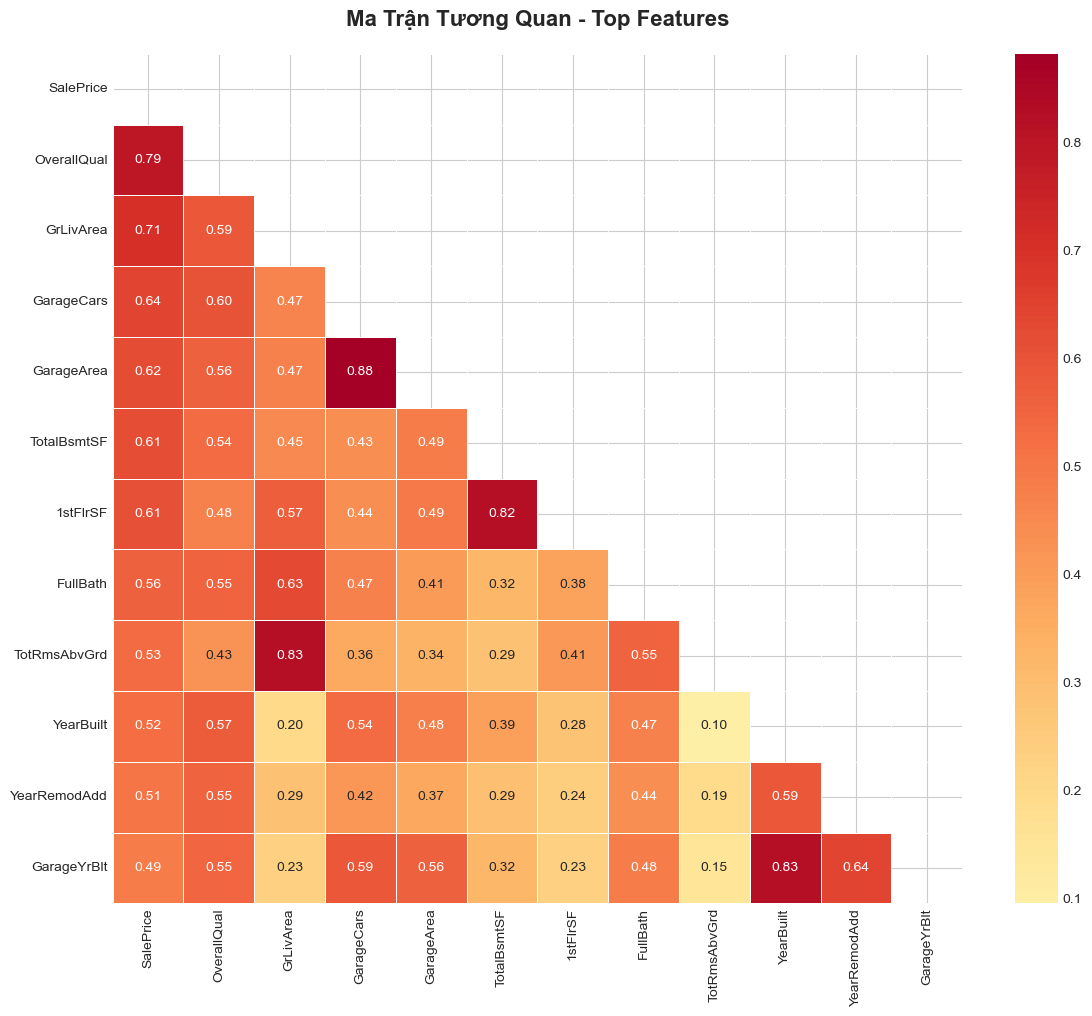

In [12]:
# Correlation heatmap for top features
top_corr_features = correlations.head(12).index.tolist()

fig, ax = plt.subplots(figsize=(12, 10))
corr_matrix = train_df[top_corr_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlBu_r', center=0, linewidths=0.5,
            square=True, ax=ax)

ax.set_title('Ma Trận Tương Quan - Top Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()


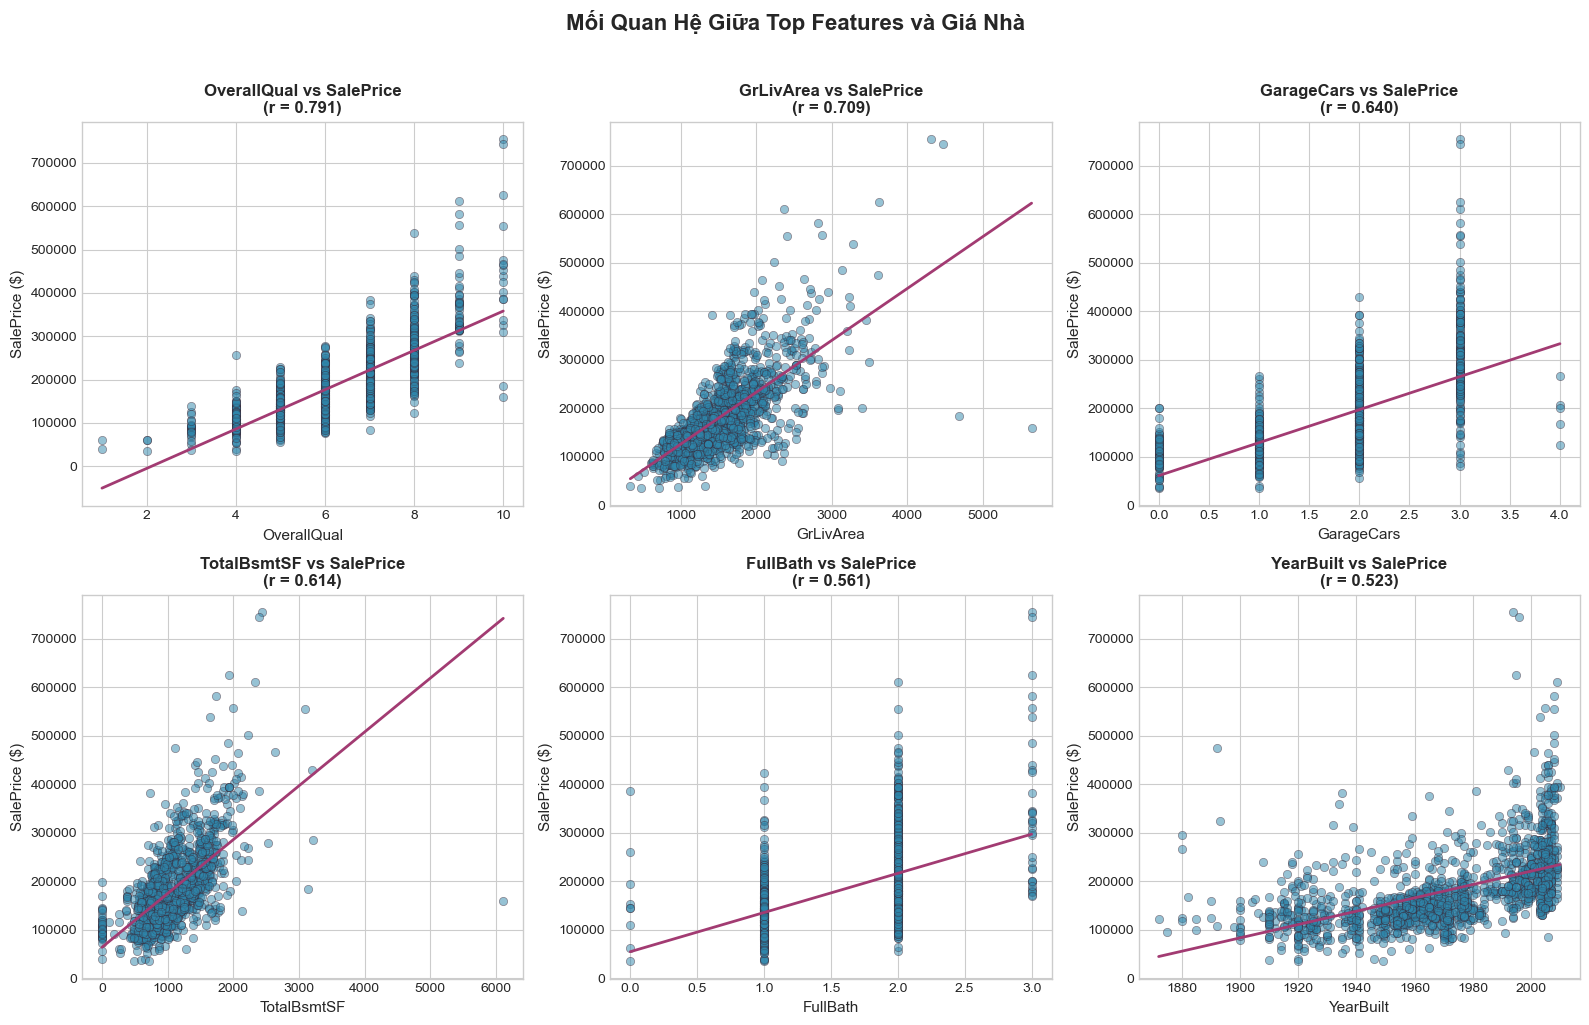

In [13]:
# Scatter plots for top correlated features
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
                'FullBath', 'YearBuilt']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    ax = axes[i]
    ax.scatter(train_df[feature], train_df['SalePrice'], 
               alpha=0.5, c=COLORS['primary'], edgecolors=COLORS['dark'], linewidth=0.5)
    
    # Add trend line
    valid_mask = train_df[feature].notna()
    z = np.polyfit(train_df.loc[valid_mask, feature], 
                   train_df.loc[valid_mask, 'SalePrice'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(train_df[feature].min(), train_df[feature].max(), 100)
    ax.plot(x_line, p(x_line), color=COLORS['secondary'], linewidth=2, label='Trend')
    
    corr = train_df[feature].corr(train_df['SalePrice'])
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('SalePrice ($)', fontsize=11)
    ax.set_title(f'{feature} vs SalePrice\n(r = {corr:.3f})', fontsize=12, fontweight='bold')

plt.suptitle('Mối Quan Hệ Giữa Top Features và Giá Nhà', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../reports/scatter_plots.png', dpi=150, bbox_inches='tight')
plt.show()


## 6. Phân Tích Biến Phân Loại (Categorical Features)


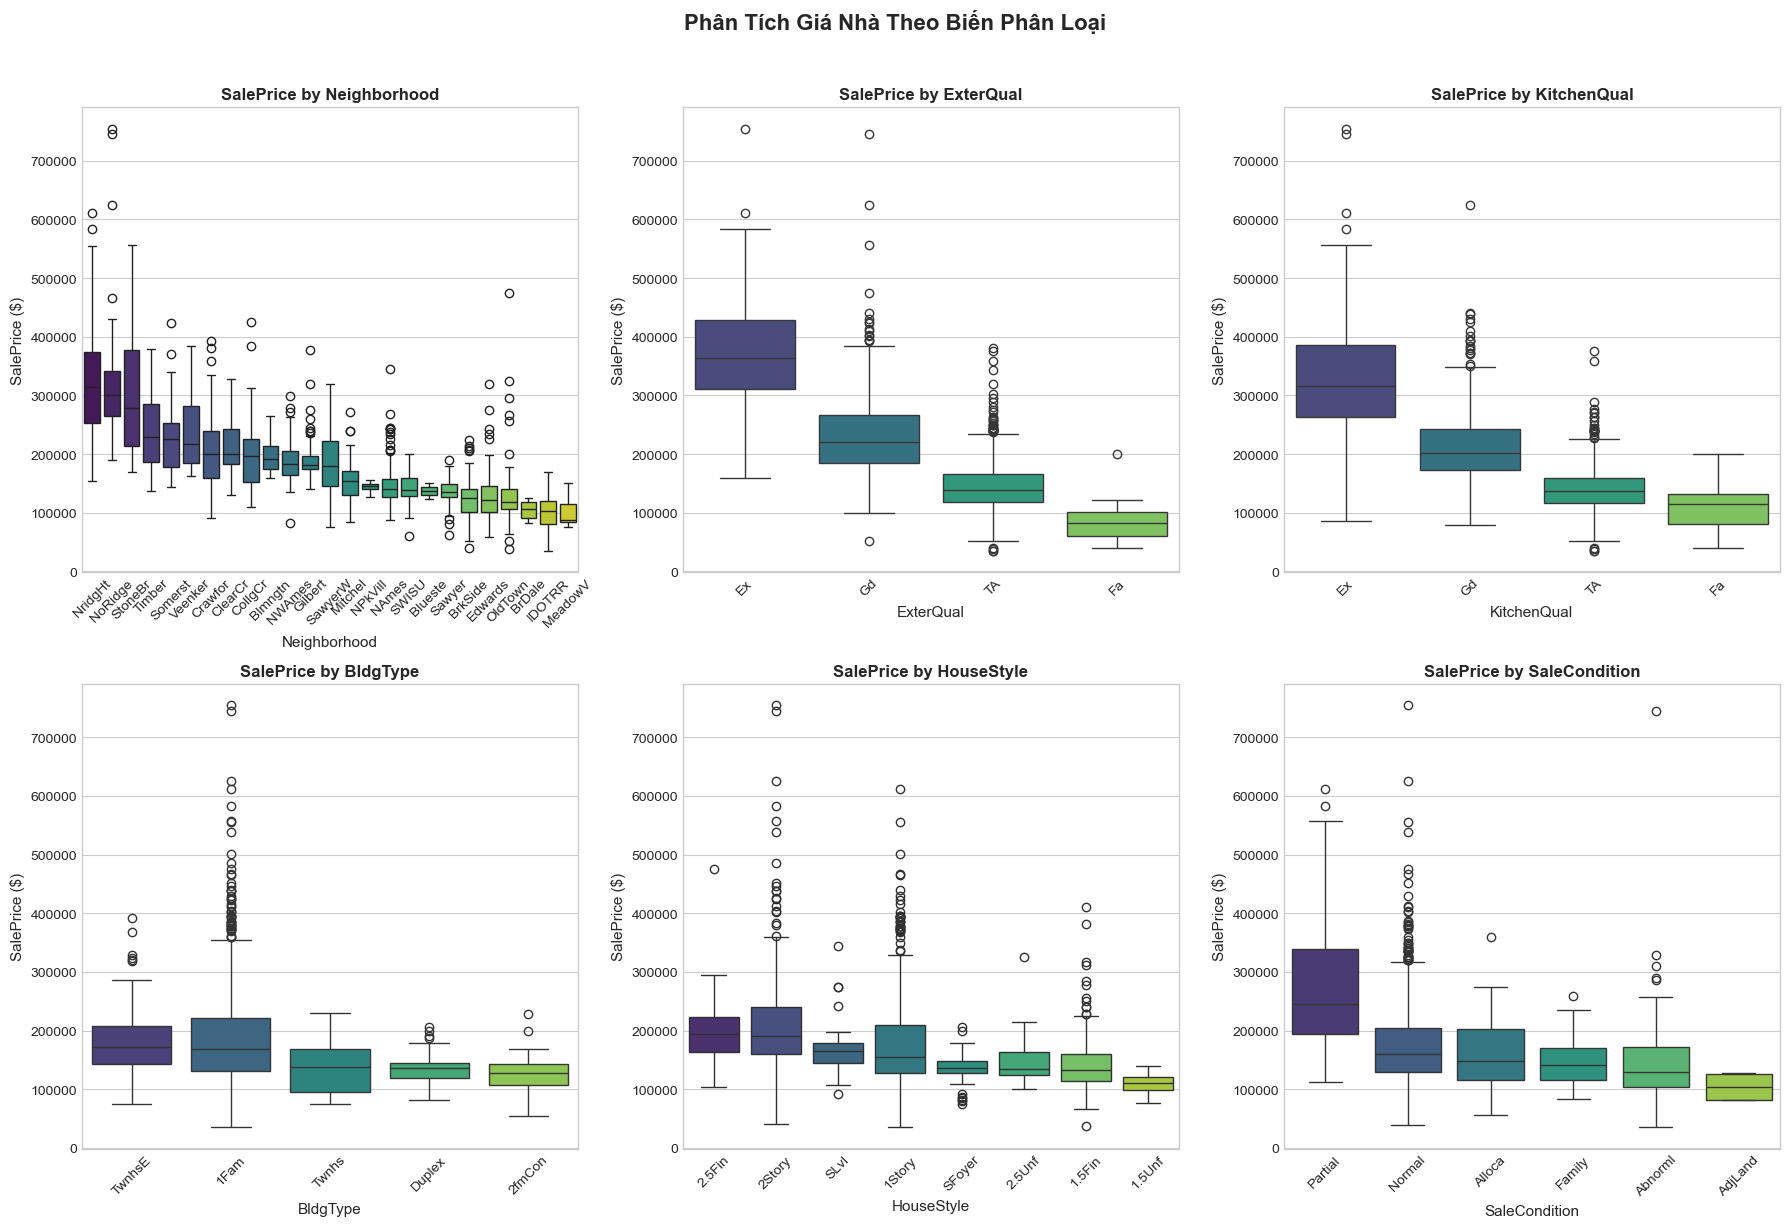

In [14]:
# Analyze categorical features vs SalePrice
important_cat_features = ['Neighborhood', 'ExterQual', 'KitchenQual', 
                          'BldgType', 'HouseStyle', 'SaleCondition']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(important_cat_features):
    ax = axes[i]
    
    # Order by median SalePrice
    order = train_df.groupby(feature)['SalePrice'].median().sort_values(ascending=False).index
    
    sns.boxplot(data=train_df, x=feature, y='SalePrice', order=order,
                palette='viridis', ax=ax)
    
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('SalePrice ($)', fontsize=11)
    ax.set_title(f'SalePrice by {feature}', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Phân Tích Giá Nhà Theo Biến Phân Loại', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../reports/categorical_analysis.png', dpi=150, bbox_inches='tight')
plt.show()


## 7. Phát Hiện Outliers


In [15]:
# Detect outliers using IQR method
def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

# Analyze outliers for key numerical features
key_features = ['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF', 'GarageArea']

print("🔍 OUTLIERS ANALYSIS (IQR Method)")
print("="*60)

for feature in key_features:
    if feature in train_df.columns:
        outliers, lower, upper = detect_outliers_iqr(train_df, feature)
        print(f"\n{feature}:")
        print(f"  - Bounds: [{lower:.2f}, {upper:.2f}]")
        print(f"  - Number of outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")


🔍 OUTLIERS ANALYSIS (IQR Method)

SalePrice:
  - Bounds: [3937.50, 340037.50]
  - Number of outliers: 61 (4.18%)

GrLivArea:
  - Bounds: [158.62, 2747.62]
  - Number of outliers: 31 (2.12%)

LotArea:
  - Bounds: [1481.50, 17673.50]
  - Number of outliers: 69 (4.73%)

TotalBsmtSF:
  - Bounds: [42.00, 2052.00]
  - Number of outliers: 61 (4.18%)

GarageArea:
  - Bounds: [-27.75, 938.25]
  - Number of outliers: 21 (1.44%)


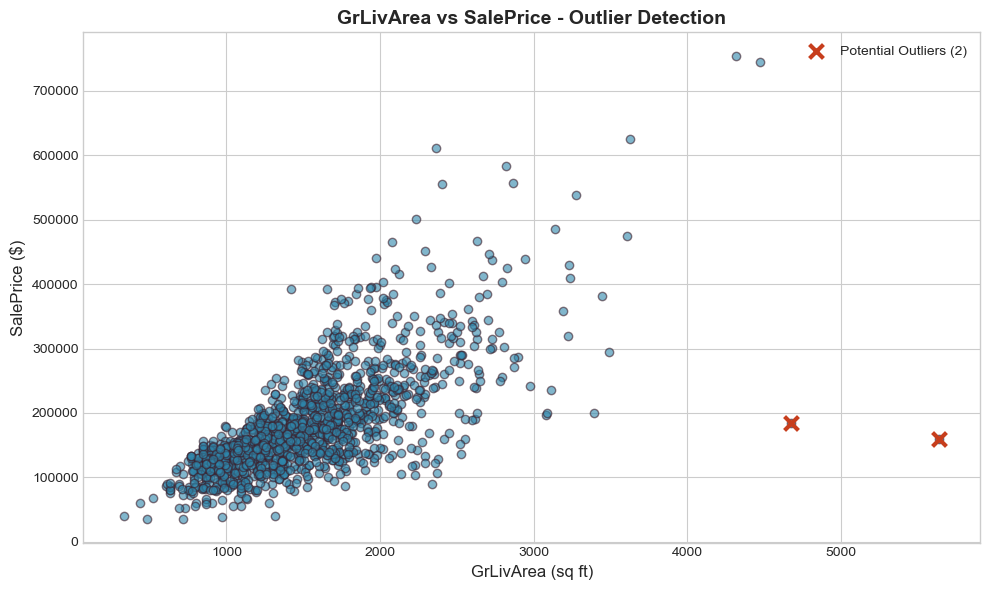


⚠️ Identified 2 potential outliers with large area but low price


In [16]:
# Identify specific outliers in GrLivArea
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(train_df['GrLivArea'], train_df['SalePrice'], 
           c=COLORS['primary'], alpha=0.6, edgecolors=COLORS['dark'])

# Highlight potential outliers
outlier_mask = (train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 300000)
ax.scatter(train_df.loc[outlier_mask, 'GrLivArea'], 
           train_df.loc[outlier_mask, 'SalePrice'],
           c=COLORS['success'], s=100, marker='x', linewidths=3,
           label=f'Potential Outliers ({outlier_mask.sum()})')

ax.set_xlabel('GrLivArea (sq ft)', fontsize=12)
ax.set_ylabel('SalePrice ($)', fontsize=12)
ax.set_title('GrLivArea vs SalePrice - Outlier Detection', fontsize=14, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig('../reports/grlivarea_outliers.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n⚠️ Identified {outlier_mask.sum()} potential outliers with large area but low price")


## 8. Kết Luận EDA

### Những phát hiện chính:
1. **Chất lượng tổng thể (OverallQual)** là yếu tố quan trọng nhất ảnh hưởng đến giá nhà
2. **Diện tích** (GrLivArea, TotalBsmtSF) có mối tương quan mạnh với giá
3. **Missing values** cần được xử lý cẩn thận, đặc biệt các cột liên quan đến tiện ích đặc biệt (Pool, Fence, Alley)
4. **Log transformation** nên được áp dụng cho biến SalePrice để giảm skewness
5. **Feature Engineering** có thể tạo ra các biến mới có giá trị như TotalSF, HouseAge

### Bước tiếp theo:
- Data Preprocessing & Feature Engineering
- Model Training & Evaluation
